<a href="https://colab.research.google.com/github/mdeepika12/AIML/blob/main/Penguin's__Body_Mass_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = sns.load_dataset('penguins')

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [ ]:
df.drop('species',axis=1,inplace=True)

In [ ]:
df.drop('island',axis=1,inplace=True)

In [ ]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,Male
1,39.5,17.4,186.0,3800.0,Female
2,40.3,18.0,195.0,3250.0,Female
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,Female


In [ ]:
# Data Preprocessing
df.isnull().sum()

,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
((df.isnull().sum()/len(df))*100).round(3)

,0
bill_length_mm,0.581
bill_depth_mm,0.581
flipper_length_mm,0.581
body_mass_g,0.581
sex,3.198


In [ ]:
df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex'],
      dtype='object')

In [ ]:
# Replacement of null with mean
df['bill_length_mm'].fillna(df['bill_length_mm'].mean() , inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


<Axes: ylabel='bill_length_mm'>

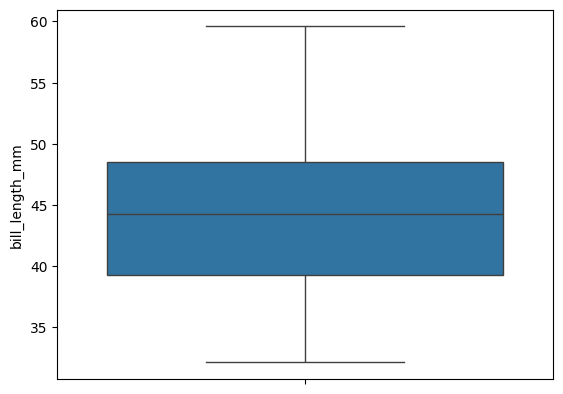

In [ ]:
# Checking for outliers
sns.boxplot(df['bill_length_mm'])


<Axes: ylabel='bill_depth_mm'>

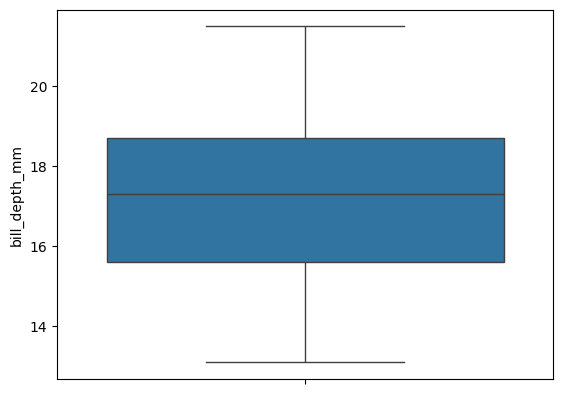

In [ ]:
sns.boxplot(df['bill_depth_mm'])


<Axes: ylabel='flipper_length_mm'>

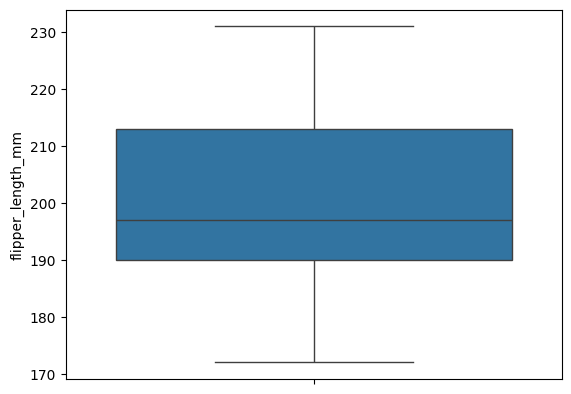

In [ ]:
sns.boxplot(df['flipper_length_mm'])


<Axes: ylabel='body_mass_g'>

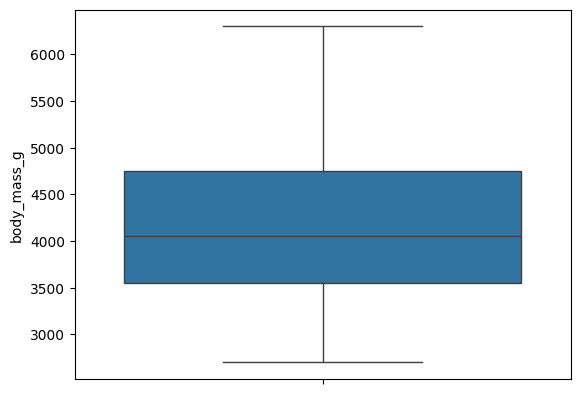

In [ ]:
sns.boxplot(df['body_mass_g'])

In [ ]:
# Encoding sex : female as 1 & male as 0
df['sex'] = df['sex'].map({'Female':1,'Male':0})



In [ ]:
#Normalization of dataset
scaler=MinMaxScaler()
df_scaler=scaler.fit_transform(df)

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>],
       [<Axes: title={'center': 'sex'}>, <Axes: >]], dtype=object)

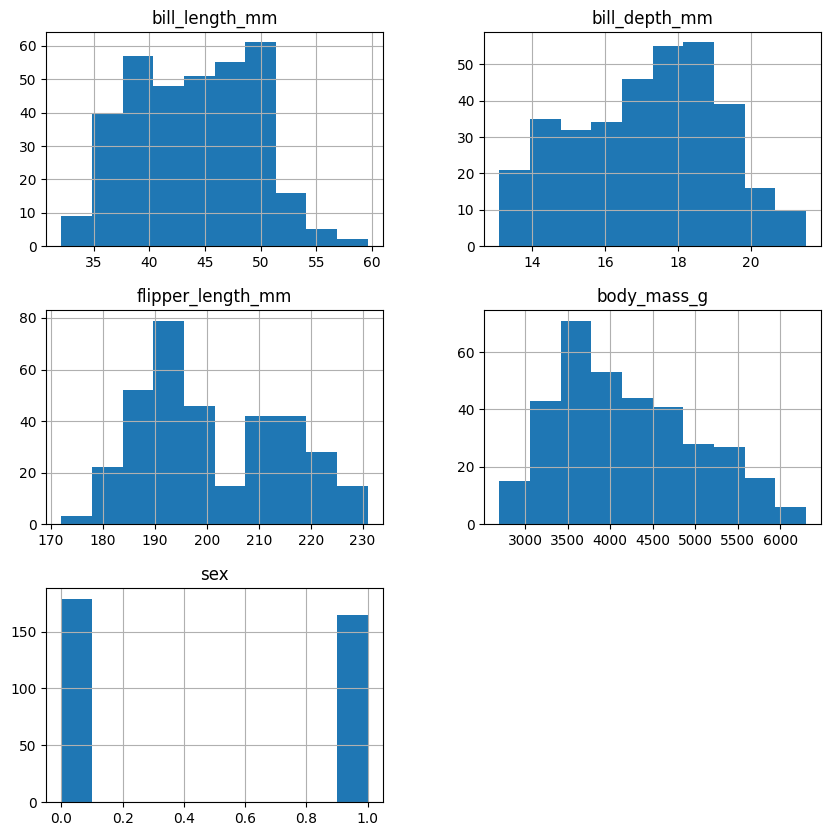

In [ ]:
df.hist(figsize=(10,10))

0= MALES & 1= FEMALES


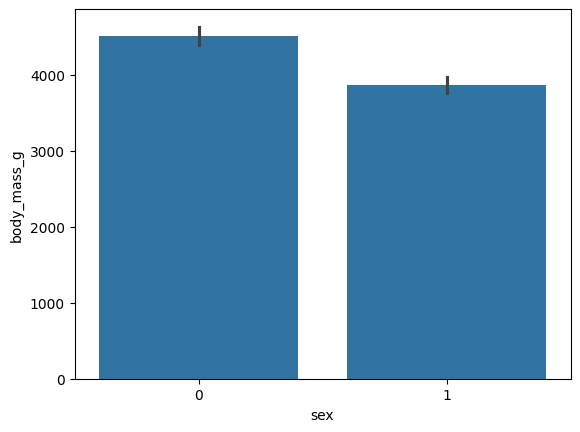

In [ ]:
sns.barplot(x='sex',y='body_mass_g',data=df)
plt.legend

print ('0= MALES & 1= FEMALES')

<Axes: xlabel='sex', ylabel='bill_length_mm'>

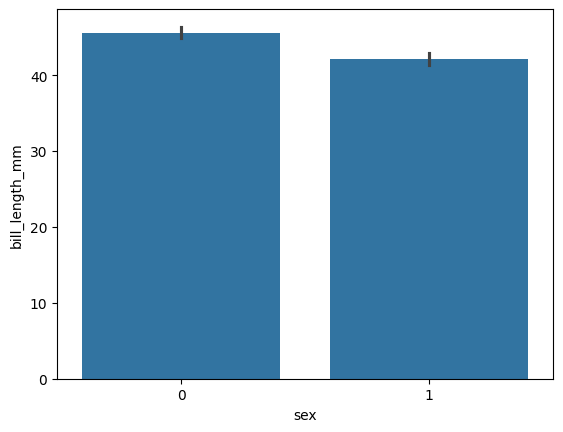

In [ ]:
sns.barplot(x='sex',y='bill_length_mm',data=df)


<Axes: xlabel='sex', ylabel='bill_depth_mm'>

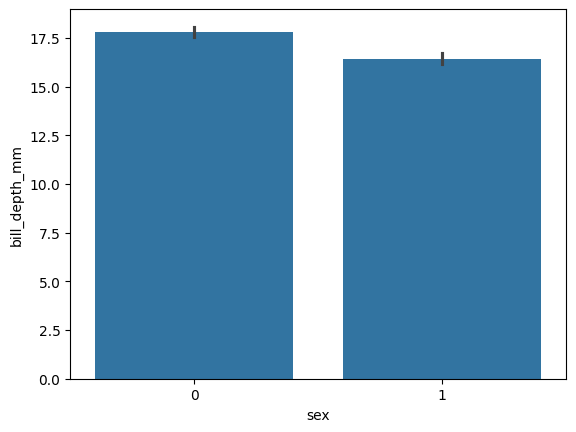

In [ ]:
sns.barplot(x='sex',y='bill_depth_mm',data=df)

<Axes: xlabel='sex', ylabel='flipper_length_mm'>

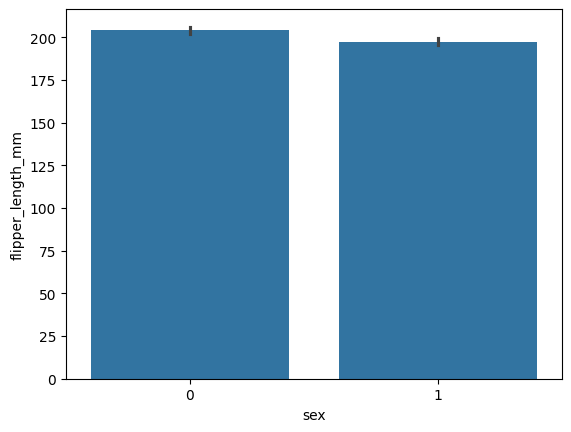

In [ ]:
sns.barplot(x='sex',y='flipper_length_mm',data=df)

In [ ]:
# Assigning Dependent Variable as BMI & Independent Variable as Length, depth and flipper of the penguin
# Multiple Linear Regression
X= df[['bill_length_mm','bill_depth_mm','flipper_length_mm']]
y= df['body_mass_g']


In [ ]:
# Train Test Split Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlr= LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred= mlr.predict(X_test)

In [ ]:
print("r2 Value of the model:")
r2_score(y_test,y_pred)

r2 Value of the model:


0.715287429464099

In [ ]:
print("MSE Value of the model:")
mean_squared_error(y_test,y_pred)

MSE Value of the model:


176395.66809970865

In [ ]:
print("Intercept of the model:")
mlr.intercept_

Intercept of the model:


-6268.343402202096

In [ ]:
print("Coefficient of the model:")
mlr.coef_

Coefficient of the model:


array([ 3.37362501, 16.93572893, 49.87900405])

In [ ]:
# Check the predicted values
prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Deviation': y_test-y_pred})
prediction.head()

,Actual,Predicted,Deviation
194,3550.0,4003.131327,-453.131327
157,3950.0,4061.643225,-111.643225
225,4550.0,4591.753352,-41.753352
208,3250.0,3692.167322,-442.167322
318,4625.0,4264.252367,360.747633


In [ ]:
import pickle
with open('Penguin.pkl','wb') as f:
  pickle.dump(mlr,f)


In [ ]:
with open('Penguin.pkl','rb') as f:
  pickle.load(f)